In [29]:
# questo script analizza il caso b1=b2=inf in cui partiamo da dato iniz. costanti, e convergiamo a uno scalino 
# che viene caratterizzato


# mettere le x_i fisse di media X, e la X fissa.
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

In [30]:
# initialize all the parameters
b1 = 100
b2 = 0.01
alfa1 = 1
alfa2 = 1
alfa3 = 1
sigma = 1
Nspin = 1000
Niter = 500000
dt = 0.001  # così è ordine 1


la media iniziale è: 0.33333333333333315


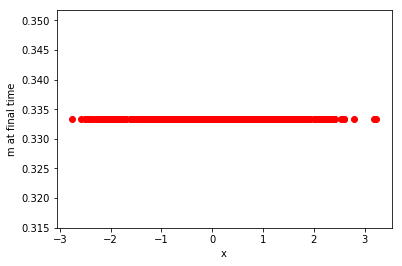

In [31]:
X = 0 #initialize the average of the diffusions

x0 = -2
x = np.random.normal(0,1,Nspin) 
#print(np.amax(x))
#print(np.amin(x))

    
########### dati per l'ordine uno iniziale
p = 2/3 # proportion of spin one's
m = np.zeros(Nspin) + 2*p - 1
    
    
m1 = np.repeat(m[0],Niter) #these will store 
m2 = np.repeat(m[1],Niter) #the first two magnetizations

M = np.repeat(np.mean(m),Niter)  #initialize the average of the magnetizations

print("la media iniziale è:", np.mean(m))


plt.plot(x,m, 'ro')
plt.xlabel('x')
plt.ylabel('m at final time')
plt.show()


In [32]:
for i in range(0,Niter):
        M[i] = np.mean(m)  #update the running values
        m1[i] = m[0]
        m2[i] = m[1]
        u1 = np.random.random_sample(Nspin) # draw N uniform samples to check the update rule 
        u2 = np.random.random_sample(Nspin)
        w1 = Nspin*((1 + m)/2)*(1-np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u1  #accept the update rules with the right proba
        w2 = Nspin*((1 - m)/2)*(1+np.tanh(b1*(m + x) + b2*(M[i] + X)))*dt > u2
        m =  m - w1*(2./Nspin) + w2*(2./Nspin)   

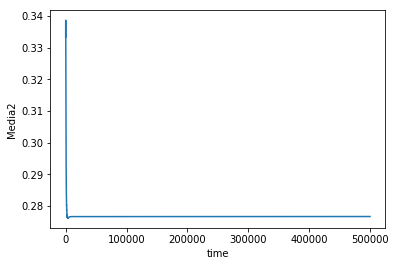

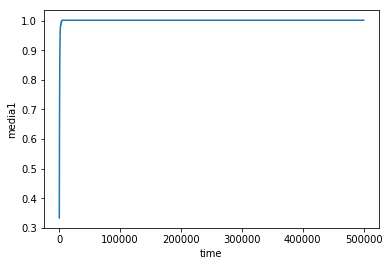

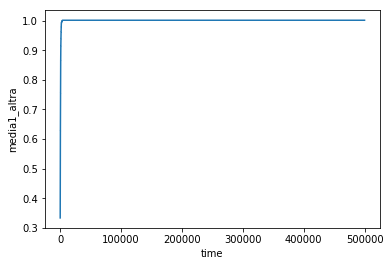

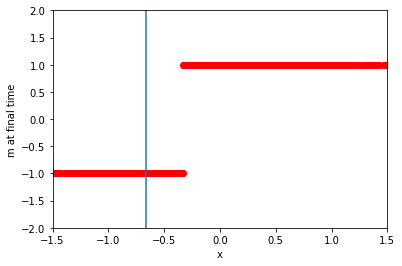

l ultimo valore trovato al tempo finale per la M: 0.2766093333333333
il valore teorico di M previsto ad ordine 1 partendo da dati costanti -0.4950149249061541


In [33]:
plt.plot(M)
plt.xlabel('time')
plt.ylabel('Media2')
plt.show() 

plt.plot(m1)
plt.xlabel('time')
plt.ylabel('media1')
plt.show() 

plt.plot(m2)
plt.xlabel('time')
plt.ylabel('media1_altra')
plt.show() 

plt.plot(x,m,'ro')
plt.xlabel('x')
plt.axvline(x0, color='r')
plt.ylabel('m at final time')
plt.axvline(-4*p +2)
plt.ylim(-2,2)
plt.xlim(-1.5,1.5)
plt.show()

print('l ultimo valore trovato al tempo finale per la M:', M[Niter-1])

M_ord1 = norm.cdf(-4*p+2) - norm.cdf(4*p-2)
print('il valore teorico di M previsto ad ordine 1 partendo da dati costanti', M_ord1)

